## Задача 1

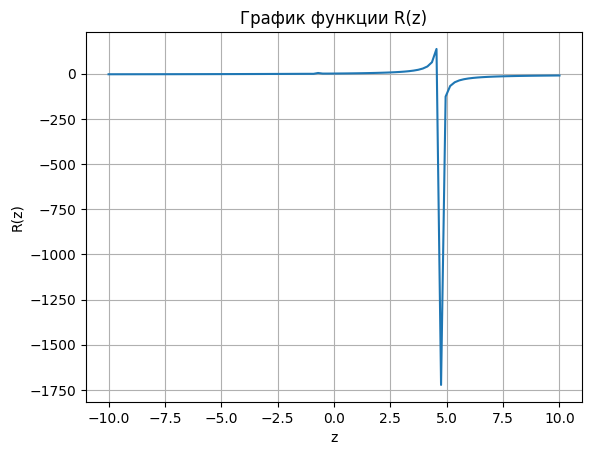

Метод не является абсолютно устойчивым.
Метод не является А-устойчивым.
Метод не является L-устойчивым.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

E = np.eye(2)
e = np.array([[1], [1]])
A = np.array([[1/2 - np.sqrt(3)/6, 0], [np.sqrt(3)/3, -1/2 - np.sqrt(3)/2]])
b = np.array([1 + np.sqrt(3)/6, -np.sqrt(3)/6])

def R(z):
    det1 = np.linalg.det(E - z*A + z*e*b)
    det2 = np.linalg.det(E - z*A)
    return det1/det2

z_values = np.linspace(-10, 10, 100)
R_values = [R(z) for z in z_values]

plt.plot(z_values, R_values)
plt.xlabel('z')
plt.ylabel('R(z)')
plt.title('График функции R(z)')
plt.grid(True)
plt.show()

eigenvalues = np.linalg.eigvals(A)

for eigenvalue in eigenvalues:
    if np.real(eigenvalue) > 0:
        print("Метод не является абсолютно устойчивым.")
        break
else:
    print("Метод абсолютно устойчив.")

h = 0.1
a_norm = np.linalg.norm(np.eye(2) - h*A)
if a_norm <= 1:
    print("Метод А-устойчив.")
else:
    print("Метод не является А-устойчивым.")

b = np.array([1 + np.sqrt(3)/6, -np.sqrt(3)/6])
l_norm = np.linalg.norm(np.eye(2) - h*A + h**2*A@b)

if l_norm <= 1:
    print("Метод L-устойчив.")
else:
    print("Метод не является L-устойчивым.")

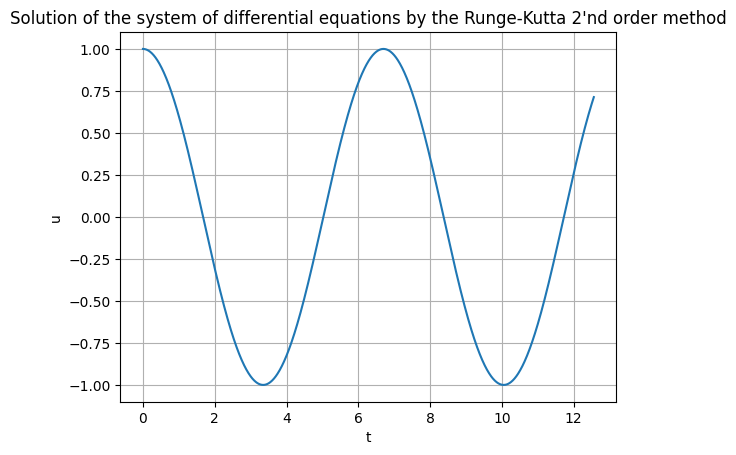

In [5]:
def f(t, u):
    return np.array([u[1], -np.sin(u[0])])

def runge_kutta_2(t0, u0, dt, N):
    t = [t0]
    u = [u0]
    
    for i in range(N):
        k = np.array([np.zeros(2)]*4)
        k_new = np.array([np.zeros(2)]*4)
        
        for j in range(4):
            k[j] = np.array(f(t[i] + dt/2, u[i] + dt/2 * k[j]))
        
        for l in range(10):
            for j in range(4):
                k_new[j] = np.array(f(t[i] + dt/2, u[i] + dt/2 * k[j]))
            
            if np.linalg.norm(k_new - k) < 1e-6:
                break
            
            k = k_new.copy()
        
        u_new = u[i] + dt/6 * (k[0] + 2*k[1] + 2*k[2] + k[3])
        u.append(u_new)
        
        t_new = t[i] + dt
        t.append(t_new)
    
    return t, u

t0 = 0
u0 = np.array([1, 0])
dt = 0.01
N = int(4 * np.pi / dt)

t, u = runge_kutta_2(t0, u0, dt, N)

u_values = np.array(u)
u1_values = u_values[:, 0]

plt.plot(t, u1_values)
plt.xlabel('t')
plt.ylabel('u')
plt.title('Solution of the system of differential equations by the Runge-Kutta 2\'nd order method')
plt.grid(True)
plt.show()